Bayesian Online Changepoint Detection paper:

https://arxiv.org/abs/0710.3742

Implementation:

https://github.com/hildensia/bayesian_changepoint_detection

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from determine_concept_drift import determine_concept_drift
import numpy as np

# AWS  RDS CPU Utilization Data

In [2]:
data = pd.read_csv("data/rds_cpu_utilization_e47b3b.csv", header=0)
data.head()

,timestamp,value
0,2014-04-10 00:02:00,14.012
1,2014-04-10 00:07:00,13.334
2,2014-04-10 00:12:00,15.000
3,2014-04-10 00:17:00,13.998
4,2014-04-10 00:22:00,14.332


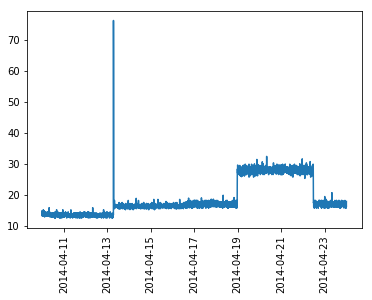

In [3]:
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
plt.plot(data["timestamp"], data["value"])
plt.xticks(rotation=90)
plt.show()

The posterior probability $P(r_t | x_{1:t})$ of the current run $r_t$'s length at each time step ($x_i$ for $i=1...t$) can be displayed, using a logarithmic color scale

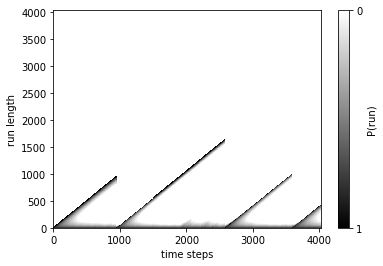

In [4]:
determine_concept_drift(data)

There appears to be 4 concepts (also referred to as $runs$) in this dataset. Student's t-distributions are used for every new concept.

# White Noise

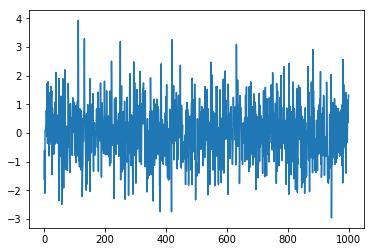

In [5]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

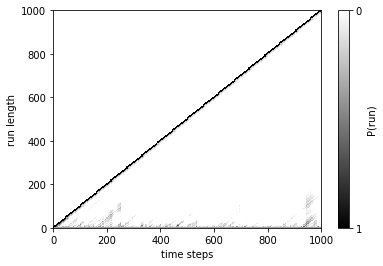

In [6]:
data = pd.DataFrame({"timestep": [i for i in range(len(samples))], "value": samples})
determine_concept_drift(data)